In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

**Data**

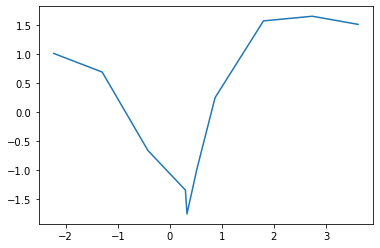

In [3]:
x=np.array([-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62])
y=np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])

plt.plot(x,y)
plt.show()

**Function to produce phi_x**

In [0]:
def define_phi(x,k):
  n=len(x)
  phi_x=np.zeros((n,k+1))
  for i in range(n):
    phi_x[i]=np.array([x[i]**j for j in range(k+1)])
  return phi_x  

**Parameter defining**

In [0]:
value=[1,2,3,4]
beta=4
x_space=np.linspace(-4,4,200)
n=10

**Compute posterior of w for each k**

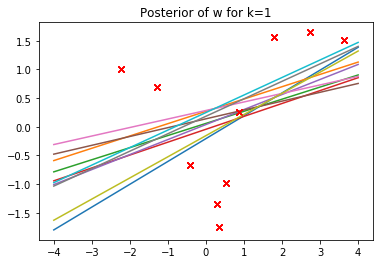

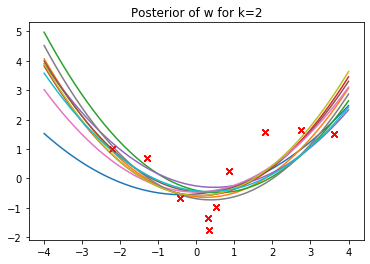

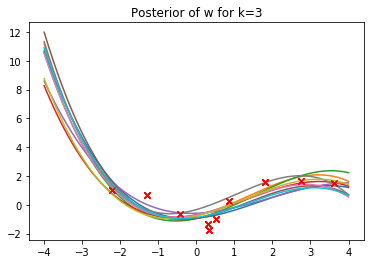

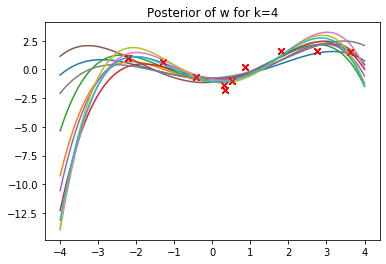

In [6]:
for k in value:
  phi_x=define_phi(x,k)
  cov_w=np.linalg.inv(beta*phi_x.T@phi_x+np.eye(k+1)) #Covariance matrix
  mu_w=beta*cov_w@phi_x.T@y #Mu of w
  w=np.random.multivariate_normal(mu_w,cov_w,10) #10 random multi dimentional w
  phi_y=define_phi(x_space,k)
  for i in range(10):
    plt.plot(x_space,phi_y@w[i])
    plt.plot(x,y,'rx')
    plt.title('Posterior of w for k='+str(k))
  plt.show()



 **Computing the posterior predictive of y*** 

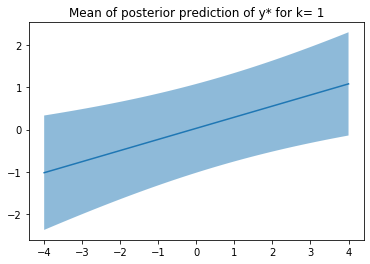

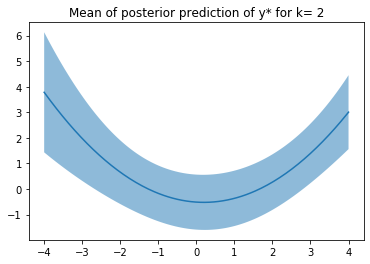

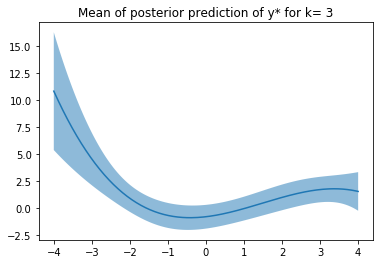

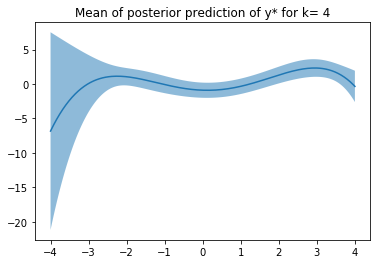

In [7]:
for k in value:
  phi_x=define_phi(x,k)
  phi_y=define_phi(x_space,k)
  cov_w=np.linalg.inv(beta*phi_x.T@phi_x+np.eye(k+1)) #Covariance matrix
  mu_w=beta*cov_w@phi_x.T@y #Mu of w
  #print(cov_w.shape)
  mu_pred=phi_y@mu_w
  dev_pred=np.sqrt(((1/beta)+phi_y@cov_w@phi_y.T).diagonal())
  mu_pl=mu_pred+2*dev_pred
  mu_mi=mu_pred-2*dev_pred
  plt.plot(x_space,mu_pred)
  plt.fill_between(x_space,mu_mi,mu_pl,alpha=0.5)
  plt.title('Mean of posterior prediction of y* for k= '+str(k))

  plt.show()


**Log Marginal Likelihood**

In [10]:
for k in value:
  phi_x=define_phi(x,k)
  marg_llik=np.log(multivariate_normal.pdf(y, mean=np.zeros(n) , cov=((1/beta)*np.eye(n)+phi_x@phi_x.T)))
  print('For k=',k,'log likelihood=', marg_llik)

For k= 1 log likelihood= -32.352015280445244
For k= 2 log likelihood= -22.77215317878222
For k= 3 log likelihood= -22.079070642234182
For k= 4 log likelihood= -22.386776180355803


**Maximum A Posterior(MAP)**

In [11]:
for k in value: 
  phi_x=define_phi(x,k)
  cov_w=np.linalg.inv(beta*phi_x.T@phi_x+np.eye(k+1)) #Covariance matrix
  mu_w=beta*cov_w@phi_x.T@y #Mu of w

  log_like=np.log(multivariate_normal.pdf(y, mean=phi_x@mu_w, cov=(1/beta)*np.eye(n)))
  print('For k=',k,'log likelihood=',log_like) 


For k= 1 log likelihood= -28.094004379075553
For k= 2 log likelihood= -15.360663659052214
For k= 3 log likelihood= -10.935846883615742
For k= 4 log likelihood= -7.225291259028579
